<a href="https://colab.research.google.com/github/s-kp/Capstone_Project-Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Initial steps**

## **Importing Libraries and the Dataset**

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm'

# Importing dataset to create a dataframe
df = pd.read_csv(url)

## **Some Basic Checks**

In [3]:
# Checking shape pf dataframe
df.shape

(119390, 32)

In [4]:
# Checking top 5 records in dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Checking bottom 5 records in dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
#Check all the coloumns present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Missing Values Treatment**

In [9]:
# Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
company     112593
agent        16340
country        488
children         4
dtype: int64
------------------------
Missing Data Percentage
company     94.31
agent       13.69
country      0.41
children     0.00
dtype: float64


In [10]:
# Removing features with over 50% of its observations missings
df.drop(['company'],axis = 1,inplace=True)

In [11]:
# If no id of children,agent or company is null,replace it with 0
df[['children','agent']] = df[['children','agent']].fillna(0)

In [12]:
# For the missing values in the country column, replace it with mode (value that appears most often)
df['country'] = df['country'].fillna(df.country.mode())

In [13]:
# Removing rows where total member arrived is none
df = df.loc[(df.adults+df.babies+df.children)!=0]

## **Handling Outliers**

In [14]:
# First Removing outliers by defining threshold based on common understanding
new_df = df.copy()

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.previous_cancellations > 0,'previous_cancellations'] = 1
new_df.loc[new_df.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled'] = 1
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [15]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time','adr','days_in_waiting_list']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [16]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room','reservation_status_date',
                      'arrival_date_year','arrival_date_day_of_month','agent','company']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


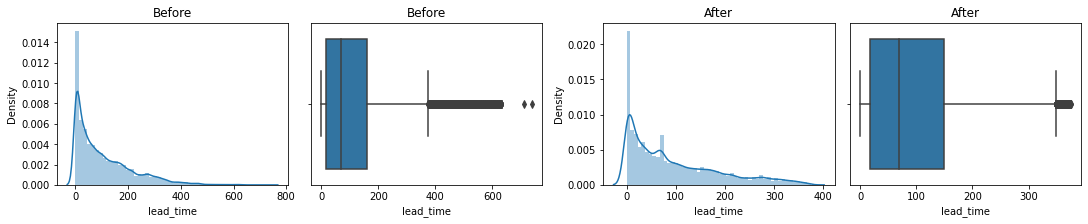

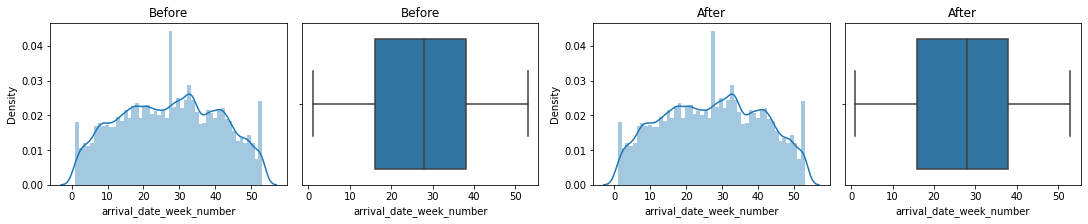

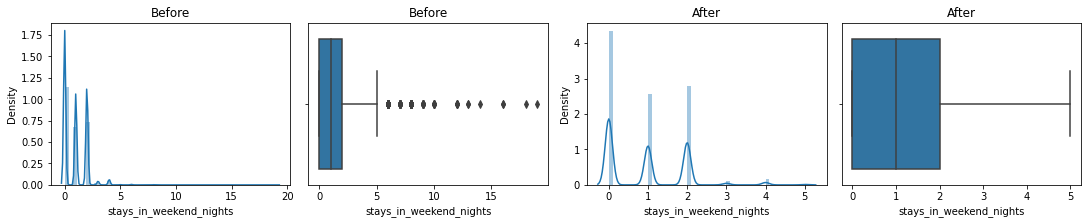

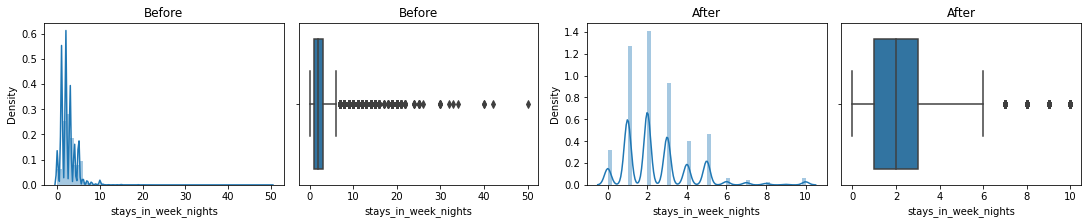

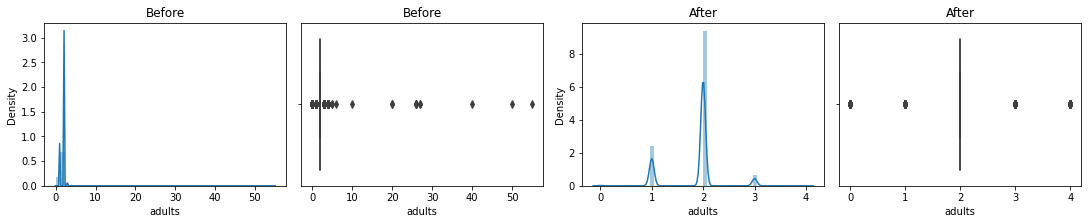

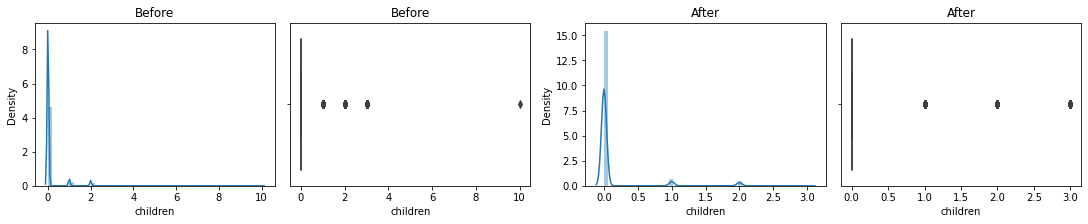

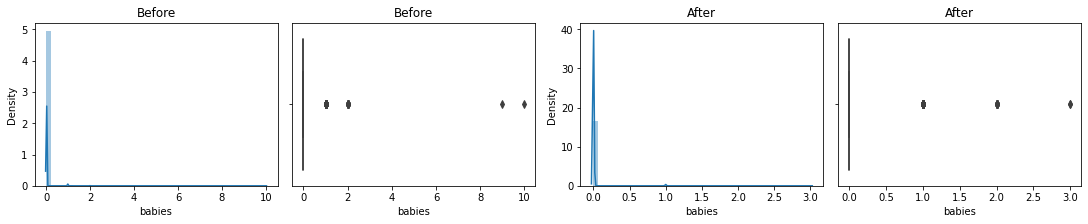

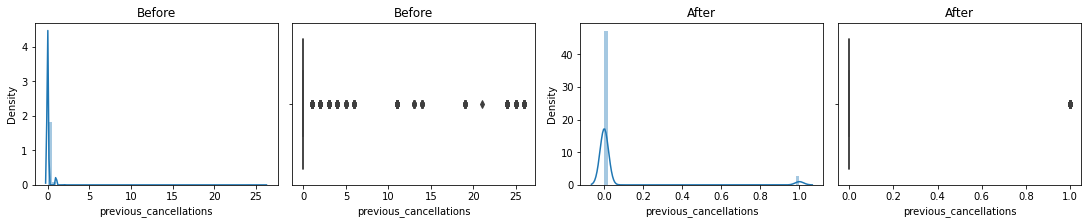

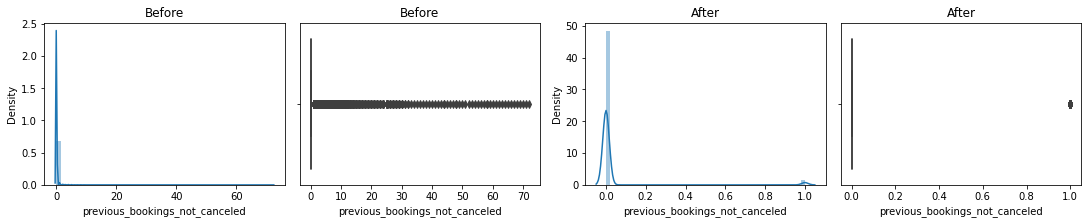

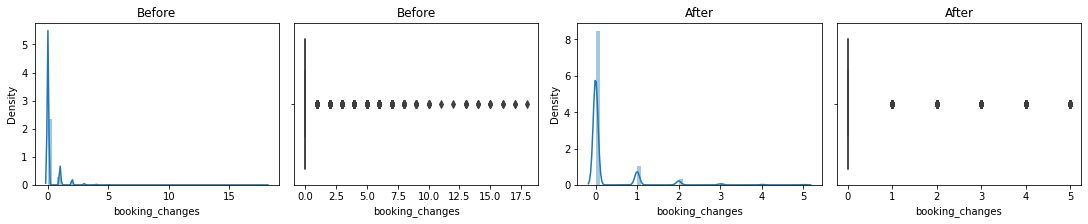

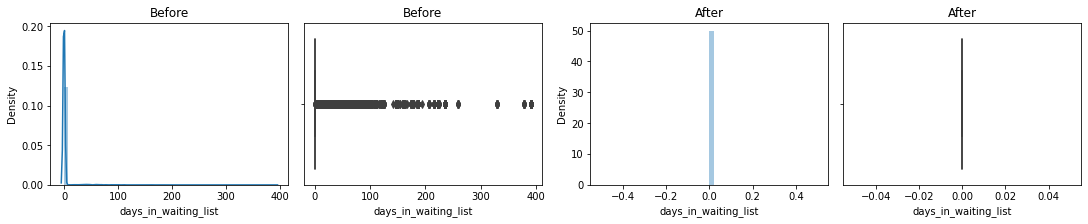

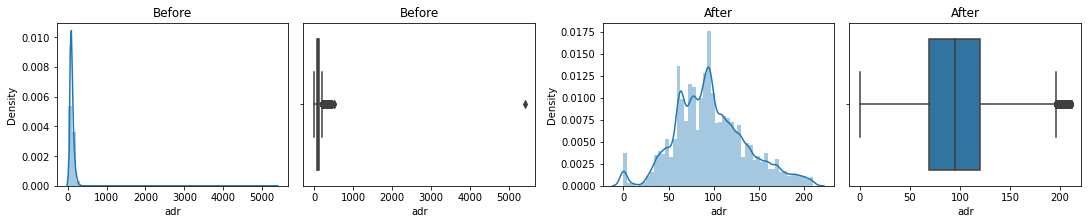

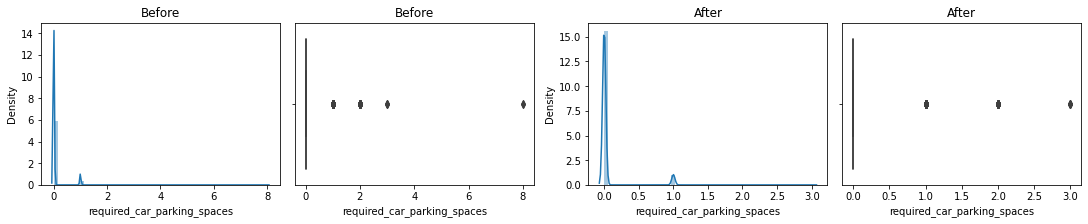

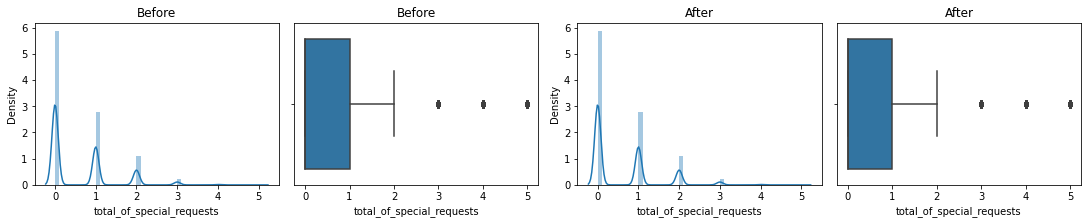

In [17]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  fig.show()



##**Cleaning and Manipulating dataset**

In [18]:
# Checking duplicates
print(len(new_df[new_df.duplicated()]))

32052


In [19]:
# Removing duplicates
new_df.drop_duplicates(inplace=True)

# Checking Shape after removing duplicates
new_df.shape

(87158, 31)

In [20]:
# Converting the datatype of relevant columns from float to integer
new_df[['children','agent','adr']] = new_df[['children','agent','adr']].astype('int64')

In [21]:
#creating some new features
new_df['same_room'] = np.where(new_df['reserved_room_type']==new_df['assigned_room_type'], 'yes', 'no')
new_df['total_children'] = new_df['children'] + new_df['babies']
new_df['total_members'] = new_df['total_children'] + new_df['adults']
new_df["total_nights"] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']
new_df['guest_type']= np.where(new_df['total_members']==1,'single',np.where(new_df['total_members']==2,'couple','family'))

In [22]:
# dropping the columns since we merged both the columns as total_children
new_df.drop(['children','babies','previous_bookings_not_canceled'],axis = 1,inplace=True)

In [23]:
# Making a list of features where number of unique values <= 2
boolean_features = [i for i in new_df.columns if len(new_df[i].value_counts()) <= 2]

# Converting boolean columns from int to object
new_df[boolean_features] = new_df[boolean_features].replace([0,1],['no','yes'])

In [24]:
# Treating arrival_date_month column for better plot
new_df['arrival_date_month'] = new_df['arrival_date_month'].replace(
                                  {'July': 'Jul', 'August': 'Aug', 'September': 'Sep',
                                  'October': 'Oct', 'November': 'Nov','December': 'Dec',
                                  'January': 'Jan', 'February': 'Feb', 'March': 'Mar',
                                  'April': 'Apr', 'May': 'May', 'June': 'Jun'})

In [25]:
# Creating a dataframe by slicing the original df where bookings were not cancelled
df_not_cancelled = new_df[new_df['is_canceled'] == 'no']

In [26]:
# New look
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,same_room,total_children,total_members,total_nights,guest_type
0,Resort Hotel,no,342.0,2015,Jul,27,1,0,0,2,BB,PRT,Direct,Direct,no,no,C,C,3,No Deposit,0,no,Transient,0,0,0,Check-Out,2015-07-01,yes,0,2,0,couple
1,Resort Hotel,no,69.0,2015,Jul,27,1,0,0,2,BB,PRT,Direct,Direct,no,no,C,C,4,No Deposit,0,no,Transient,0,0,0,Check-Out,2015-07-01,yes,0,2,0,couple
2,Resort Hotel,no,7.0,2015,Jul,27,1,0,1,1,BB,GBR,Direct,Direct,no,no,A,C,0,No Deposit,0,no,Transient,75,0,0,Check-Out,2015-07-02,no,0,1,1,single
3,Resort Hotel,no,13.0,2015,Jul,27,1,0,1,1,BB,GBR,Corporate,Corporate,no,no,A,A,0,No Deposit,304,no,Transient,75,0,0,Check-Out,2015-07-02,yes,0,1,1,single
4,Resort Hotel,no,14.0,2015,Jul,27,1,0,2,2,BB,GBR,Online TA,TA/TO,no,no,A,A,0,No Deposit,240,no,Transient,98,0,1,Check-Out,2015-07-03,yes,0,2,2,couple


# **Exploratory Data Analysis**



##**Univariate Analysis**

In [27]:
# Defining the list of target variables and varables to be excluded
exclude = [i for i in new_df.columns if len(new_df[i].value_counts()) > 15]
target = [i for i in new_df.columns if i not in exclude]

# Defining r to autofit the number and size of plots
r = np.ceil(len(target)/3)

In [28]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

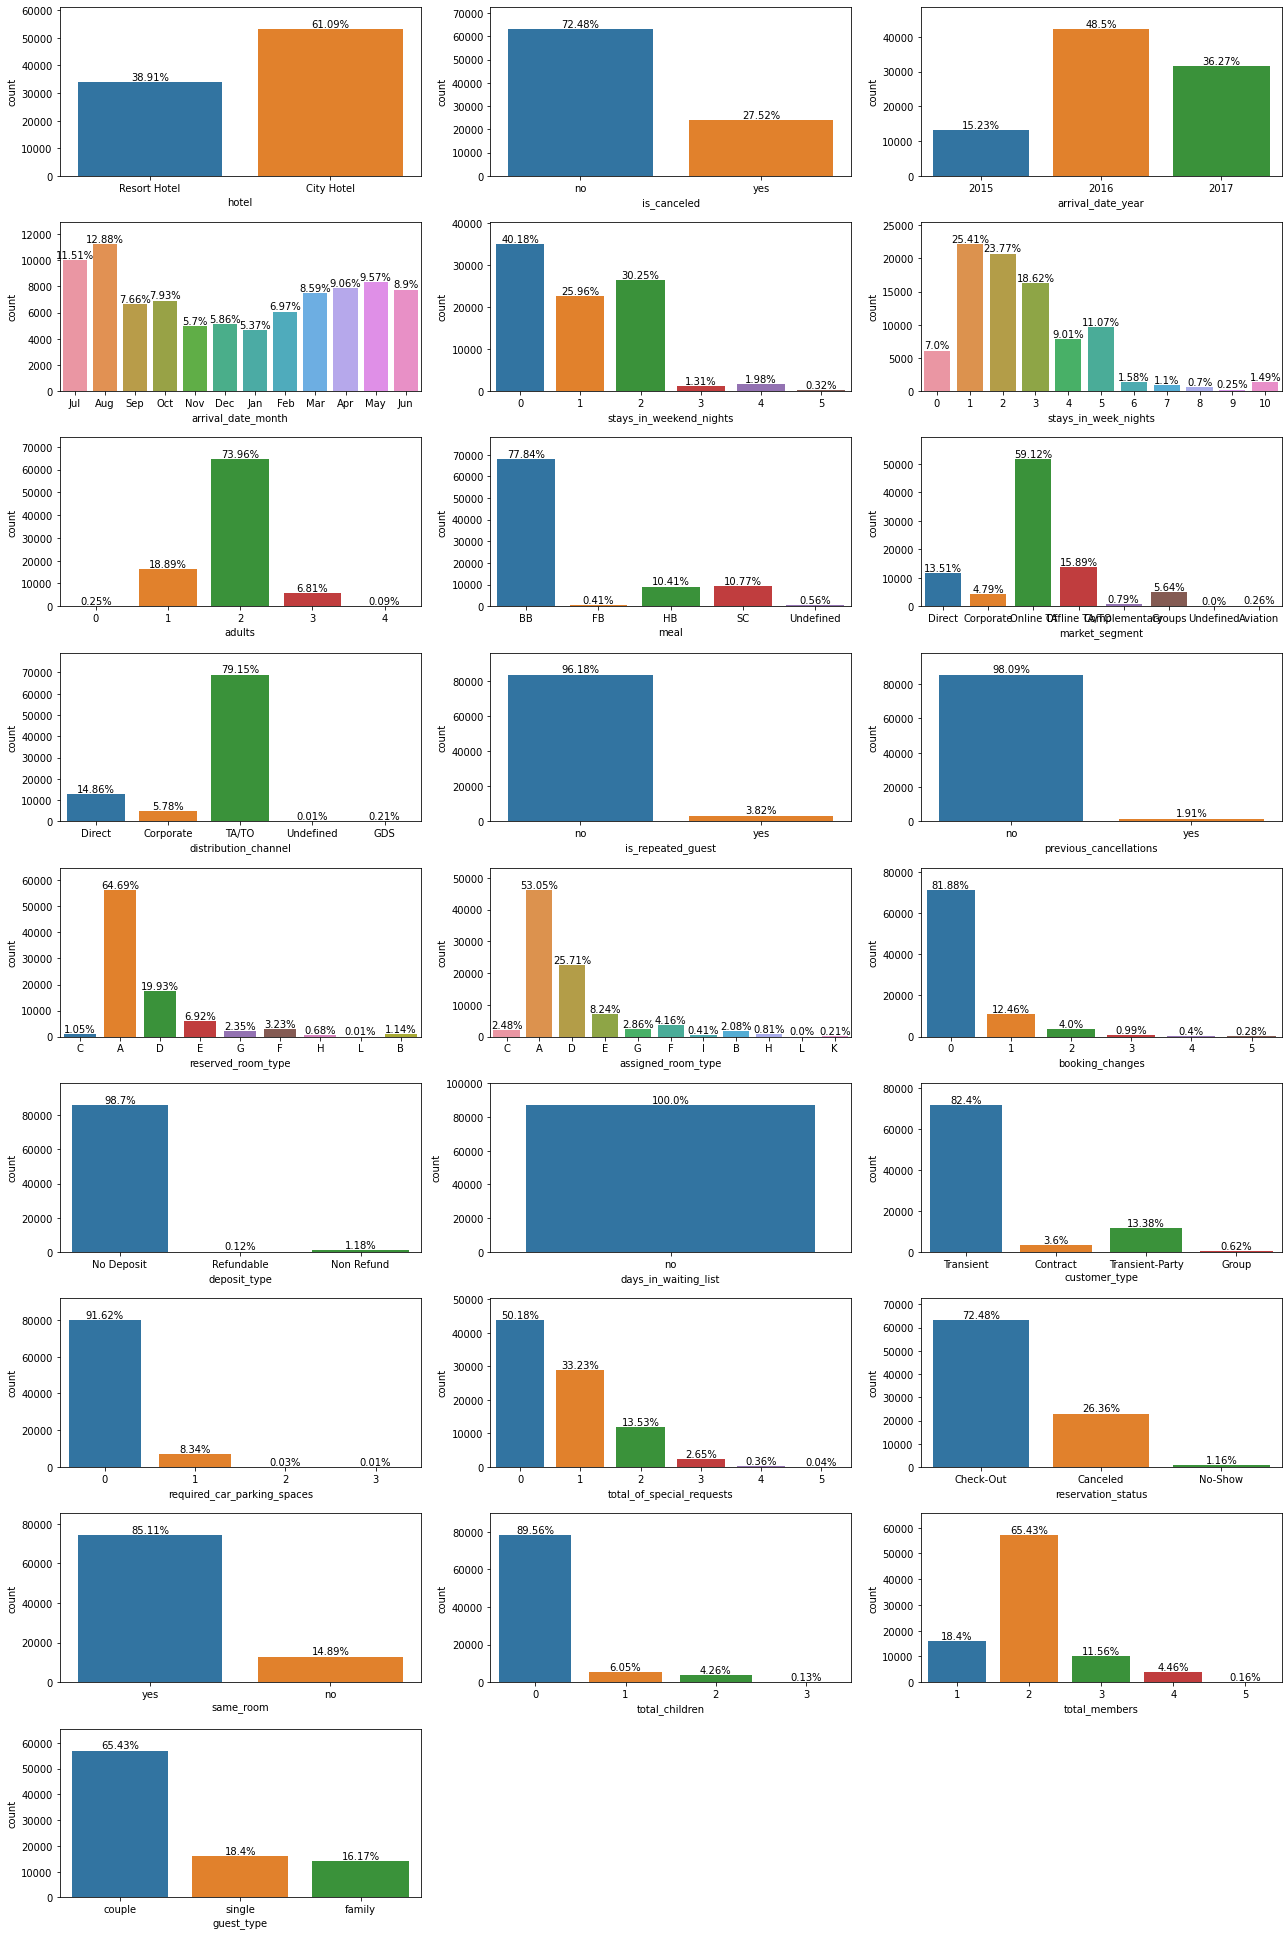

In [29]:
# Plotting the countplots for each target variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(new_df[column]).margins(y=0.15)
  plt.tight_layout()
  annot_percent(plot)

Observations:
1. pass
2. pass



##**Hotelwise Analysis**

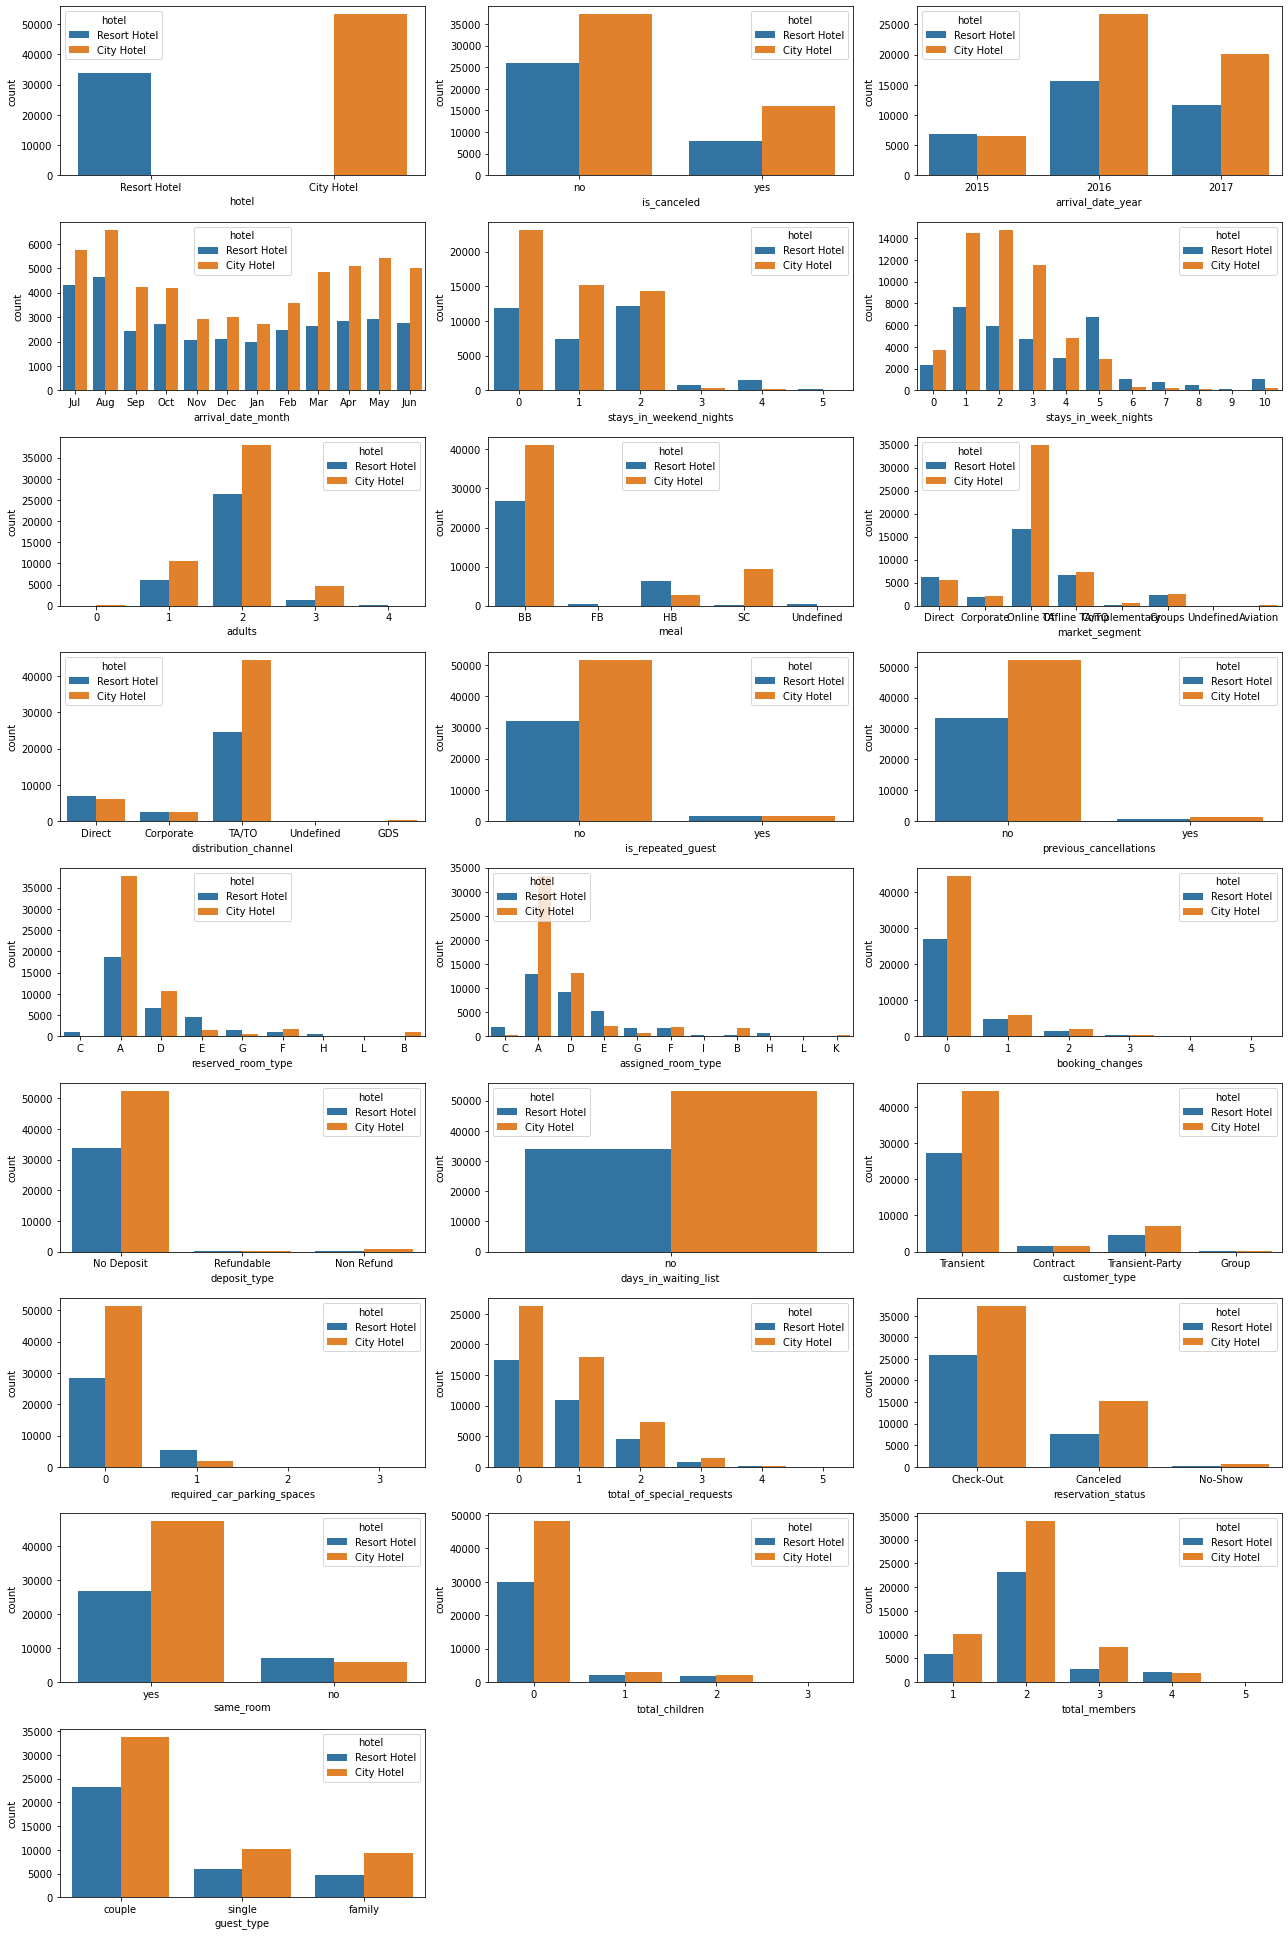

In [30]:
# Hotelwise Comparative Analysis
plt.figure(figsize=(18,r*3))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(new_df[column],x= column, hue=new_df['hotel'])
  plt.tight_layout()

Observations:
1. pass
2. pass